In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial
import pickle, os, time

import entropy

#basedir, desc = 'saveddata3/Regression/v1', 'Regression'
#basedir, desc = 'saveddata/MNIST/v1', 'MNIST'
#basedir, desc = 'saveddata3/NoisyClassifier/v1', 'NoisyClassifier'
#basedir, desc = 'saveddata3/NoisyClassifierWine/v2', 'NoisyClassifierWine'
basedir, desc = 'saveddata3/NoisyClassifierWine/v3d', 'NoisyClassifierWineV3'
#basedir, desc = 'saveddata3/NoisyClassifierWine/v10d', 'NoisyClassifierWineV10'



/home/artemy/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
vals = {}
vals['VIB']         = {}
vals['VIB']['reg']  = {'tst': {}, 'trn': {}}
vals['VIB']['sq']   = {'tst': {}, 'trn': {}}
vals['nlIB']        = {}
vals['nlIB']['reg'] = {'tst': {}, 'trn': {}}
vals['nlIB']['sq']  = {'tst': {}, 'trn': {}}

In [3]:
n_average_epoch = 10  # Average results for these last n epochs, to smooth
for fname in os.listdir(basedir):
    with open(basedir + '/' + fname, 'rb') as f:
        if fname.endswith('-base') or fname.startswith('_tf_basemodel') or fname=='checkpoint':
            continue
        print(basedir + '/' + fname)
        cfg, saved_data = pickle.load(f)
        sqmode = 'sq' if cfg['squaredIB'] else 'reg'
        beta   = saved_data[0]['beta']
        #if False and 'loss' in saved_data[0]['trn']:
        #    losses = np.array([r['trn']['loss'] for r in saved_data])
        #    lrow = saved_data[len(losses)-best_of_last+np.argmin(losses[-best_of_last:])]
        #else:
        #    lrow = saved_data[-1]
                        
        _, mode, *_ = fname.split("-",)
        #mode = lrow['mode']
        for r in ['trn','tst']:
            val_dict = {}
            for lrow in saved_data[-n_average_epoch:]:
                var   = lrow['noisevar']
                l     = lrow[r]
                mx    = l['activations']
                n, d  = mx.shape
                mcH   = entropy.get_mc_entropy(mx, var)
                hCond = entropy.gaussian_entropy_np(d, var)
                l['Ixt_mc'] = mcH - hCond
                for k in ['Ixt','Ixt_lb','Iyt','Ixt_mc']:
                    if k not in val_dict:
                        val_dict[k]=0.
                    val_dict[k] += l[k]/n_average_epoch
            
            print('%s %s beta: %0.4f Ixt: %0.2f-%0.2f (%0.2f) Iyt: %0.2f' % 
                  (r, sqmode, beta, val_dict['Ixt_lb'], val_dict['Ixt'], val_dict['Ixt_mc'], val_dict['Iyt']))
            
            if beta not in vals[mode][sqmode][r] or \
               (val_dict['Ixt_mc'] <= vals[mode][sqmode][r][beta]['Ixt_mc'] and 
                val_dict['Iyt']    >= vals[mode][sqmode][r][beta]['Iyt']):
                vals[mode][sqmode][r][beta] = val_dict
                if False:
                    plt.figure()
                    plt.scatter(mx[:,0], mx[:,1], s=l['noisevar'], alpha=.3)
                    plt.title('beta=%.4f mode=%s'%(beta, mode))
        print()

saveddata3/NoisyClassifierWine/v3d/results-VIB-0.00100-reg-run0
trn reg beta: 0.0010 Ixt: 3.17-4.34 (3.26) Iyt: 0.16
tst reg beta: 0.0010 Ixt: 3.17-4.34 (3.26) Iyt: 0.16

saveddata3/NoisyClassifierWine/v3d/results-nlIB-0.00100-reg-run0
trn reg beta: 0.0010 Ixt: 5.97-7.22 (5.33) Iyt: 0.17
tst reg beta: 0.0010 Ixt: 5.97-7.22 (5.31) Iyt: 0.16

saveddata3/NoisyClassifierWine/v3d/results-VIB-0.00193-reg-run0
trn reg beta: 0.0019 Ixt: 2.06-3.13 (2.31) Iyt: 0.16
tst reg beta: 0.0019 Ixt: 2.06-3.13 (2.31) Iyt: 0.16

saveddata3/NoisyClassifierWine/v3d/results-nlIB-0.00193-reg-run0
trn reg beta: 0.0019 Ixt: 4.66-5.91 (4.37) Iyt: 0.17
tst reg beta: 0.0019 Ixt: 4.65-5.90 (4.37) Iyt: 0.17

saveddata3/NoisyClassifierWine/v3d/results-VIB-0.00373-reg-run0
trn reg beta: 0.0037 Ixt: 1.34-2.11 (1.55) Iyt: 0.15
tst reg beta: 0.0037 Ixt: 1.34-2.12 (1.54) Iyt: 0.15

saveddata3/NoisyClassifierWine/v3d/results-nlIB-0.00373-reg-run0
trn reg beta: 0.0037 Ixt: 3.16-4.40 (3.25) Iyt: 0.16
tst reg beta: 0.0037 Ixt:

/home/artemy/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/artemy/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


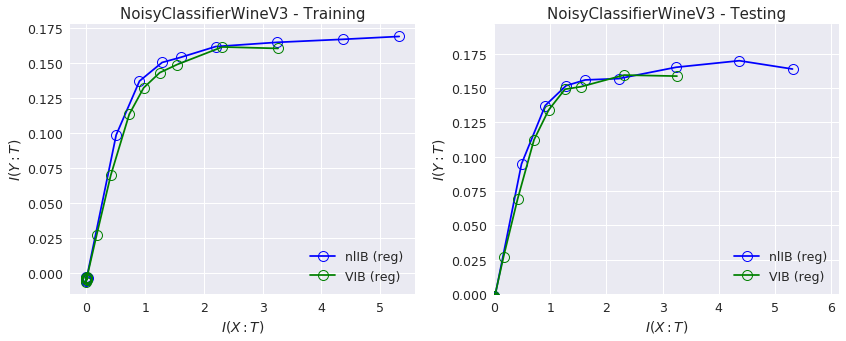

In [4]:
import seaborn as sns
sns.set_style('white')
sns.set(font_scale=1.25)
colordict={('nlIB','reg'):'blue', ('nlIB','sq'):'blue', ('VIB','reg'):'green', ('VIB','sq'):'green'}

plt.figure(figsize=(12,5))
for sqmode in ['reg','sq']:
    for rndx, r in enumerate(['trn','tst']):
        plt.subplot(1,2,rndx+1)
        for mode in ['nlIB', 'VIB']:
            d     = vals[mode][sqmode][r]
            bvals = sorted(d.keys())
            xt    = [d[b]['Ixt'] for b in bvals]
            xtlb  = [d[b]['Ixt_lb'] for b in bvals]
            xtmc  = [d[b]['Ixt_mc'] for b in bvals]
            yt    = [d[b]['Iyt'] for b in bvals]
            if len(xtmc):
                plt.plot(xtmc, yt, ls={'reg':'-','sq':'-'}[sqmode], 
                         color=colordict[(mode,sqmode)],
                         marker='o', markersize=10, markerfacecolor='none', markeredgewidth=1,
                         label=mode + " (%s)" % sqmode)
                #plt.fill_betweenx(yt, xtlb, xt, alpha=0.3, label=mode)
        plt.ylabel('$I(Y:T)$')
        plt.xlabel('$I(X:T)$')
        plt.legend(loc='lower right')
        plt.title(desc + ' - ' + {'tst':'Testing', 'trn':'Training'}[r])

        #plt.ylim([0, plt.ylim()[1]])
        #plt.xlim([0, plt.xlim()[1]])
        if False and desc == 'MNIST':
            maxv = 1.1*plt.ylim()[1]
            plt.plot([0, maxv], [0,maxv], 'k--', lw=1)
            plt.xlim([0, maxv])
            
        # Plot optimal Gaussian IB curve 
        #   doesn't seem to work ! -- suspect it has to do with dimensionality
        if False and desc=='Regression':
            with open('data/regression-10-100.pkl', 'rb') as f:
                data = pickle.load(f)
            mx = np.hstack([data[r+'_data'], data[r+'_labels']])
            xdims = data[r+'_data'].shape[1]
            xs, ys = entropy.get_gib_curve(np.cov(mx.T.astype('float64')), xdims)
            #print(xs, ys)
            plt.plot(xs/10, ys, c='k',label='Optimal')
    
plt.ylim([0, 1.1*plt.ylim()[1]])
plt.xlim([0, 1.1*plt.xlim()[1]])

plt.tight_layout()
plt.savefig('plots/%s.pdf'%desc)
    
    